In [3]:
%pip install seaborn

In [4]:
%pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn

<ipython-input-5-7d23b650d357>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# load the data into a dataframe
df = pd.read_csv("ogData.csv")
# Looking at data types
df.info()
# No object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67712 entries, 0 to 67711
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROCEDUREID           67712 non-null  int64  
 1   MORTALITY_EVENT       67712 non-null  int64  
 2   MI_EVENT              67712 non-null  int64  
 3   STROKE_EVENT          67712 non-null  int64  
 4   GENDER                67712 non-null  int64  
 5   BMI                   67383 non-null  float64
 6   PREOP_DIABETES        67560 non-null  float64
 7   PREOP_DIALYSIS        67567 non-null  float64
 8   PREOP_DYSRHYTHMIA     67540 non-null  float64
 9   PREOP_SMOKING         67491 non-null  float64
 10  PRIOR_CAD             67547 non-null  float64
 11  PRIOR_CHF             67531 non-null  float64
 12  COPD                  67543 non-null  float64
 13  HTN                   67560 non-null  float64
 14  PRIOR_BYPPVIENDAR     67481 non-null  float64
 15  PRIOR_CABG         

In [7]:
# Looking at stats for outliers
df.describe()
# Looking at the differences between the mean and max it looks like there are a lot of outliers
# Might be because of the Catagorical nature of our data

,PROCEDUREID,MORTALITY_EVENT,MI_EVENT,STROKE_EVENT,GENDER,BMI,PREOP_DIABETES,PREOP_DIALYSIS,PREOP_DYSRHYTHMIA,PREOP_SMOKING,...,LESION_SIDE_1,LESION_STENO_1,LESION_TYPE_1,NEUROCHANGE,TOTALPROCTIME,URGENCY,POSTOP_COMPLICATIONS,POSTOP_HEMABLEED,POSTOP_INFECT,POSTOP_PSEUDOANEUR
count,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67383.000000,67560.000000,67567.000000,67540.000000,67491.000000,...,67315.000000,62565.000000,67217.000000,67341.000000,66483.000000,67534.000000,67602.000000,67601.000000,67594.000000,67598.000000
mean,52207.407860,0.010707,0.004490,0.014975,1.373124,28.392593,0.920589,0.041973,0.941605,0.953979,...,1.498730,83.194326,1.267060,0.021443,72.484740,1.263319,0.064643,0.032455,0.000473,0.005873
std,20356.754534,0.102920,0.066854,0.121454,0.717417,5.983549,1.313086,0.355083,1.878353,0.728554,...,0.500002,12.525472,0.969689,0.274904,46.910752,0.543305,0.245897,0.251469,0.023073,0.132384
min,12646.000000,0.000000,0.000000,0.000000,1.000000,6.100000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34939.750000,0.000000,0.000000,0.000000,1.000000,24.400000,0.000000,0.000000,0.000000,0.000000,...,1.000000,80.000000,1.000000,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,51880.500000,0.000000,0.000000,0.000000,1.000000,27.700000,0.000000,0.000000,0.000000,1.000000,...,1.000000,85.000000,1.000000,0.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,68809.250000,0.000000,0.000000,0.000000,2.000000,31.600000,2.000000,0.000000,0.000000,1.000000,...,2.000000,90.000000,1.000000,0.000000,86.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,124873.000000,1.000000,1.000000,1.000000,99.000000,80.100000,4.000000,4.000000,6.000000,2.000000,...,2.000000,804.000000,8.000000,4.000000,6970.000000,3.000000,1.000000,3.000000,2.000000,4.000000


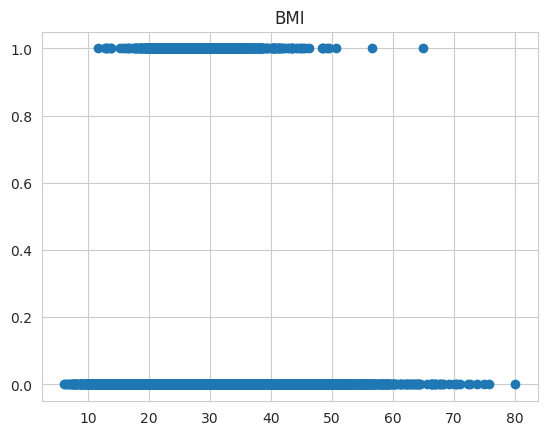

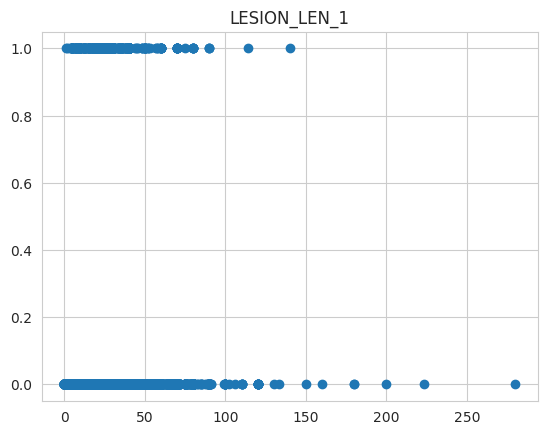

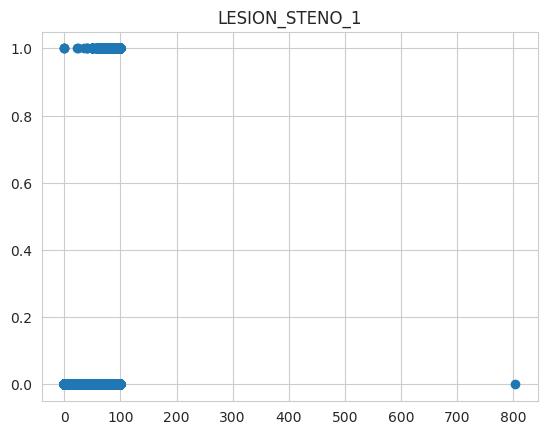

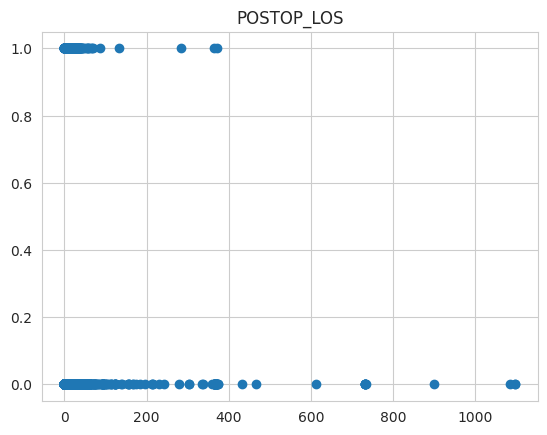

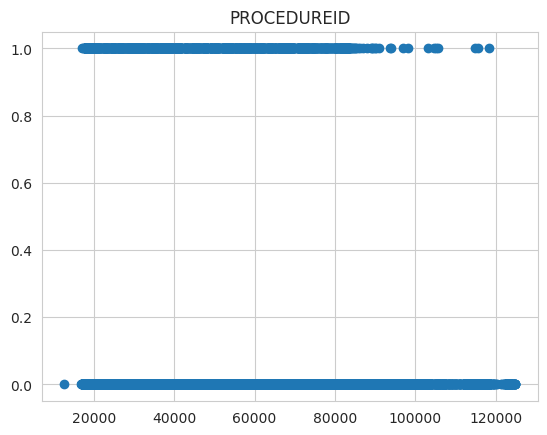

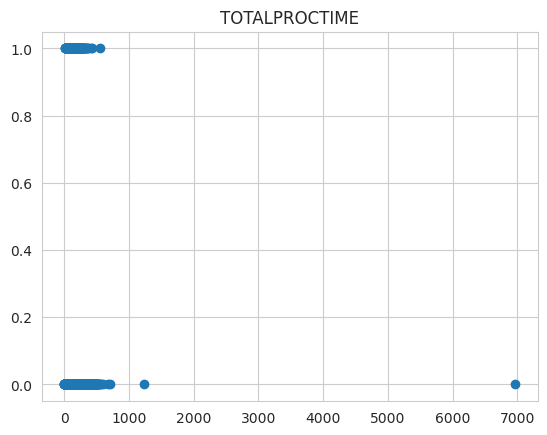

In [14]:
# Creating new dataframe for numerical data
num_data = df[['BMI', 'LESION_LEN_1', 'LESION_STENO_1', 'POSTOP_LOS', 'PROCEDUREID', 'TOTALPROCTIME']]

In [ ]:
# Graphing numerical data for Mortality
for k in num_data:
    if k != 'MORTALITY_EVENT' or 'MI_EVENT' or 'STROKE_EVENT':
        plt.scatter(df[k],df['STROKE_EVENT']) ### Change the [_EVENT] to MI or STROKE when you want to look for them
        plt.title(k)
        plt.show()

In [9]:
# Ceating new dataframe for categorical data (excluding dependent variables)
cat_data = df [['ANESTHESIA','APPROACH','ASACLASS', 'COPD', 
                'GENDER', 'HIGHRISK', 'HTN', 'INDICATION',
                'LESION_LOC_1', 'LESION_SIDE_1', 'LESION_TYPE_1',
                'NEUROCHANGE', 'POSTOP_COMPLICATIONS', 
                'POSTOP_HEMABLEED', 'POSTOP_INFECT', 
                'POSTOP_PSEUDOANEUR', 'PREOP_DIABETES',
                'PREOP_DIALYSIS', 'PREOP_DYSRHYTHMIA',
                'PREOP_SMOKING', 'PRIOR_BYPPVIENDAR',
                'PRIOR_CABG', 'PRIOR_CAD', 'PRIOR_CEACAS',
                'PRIOR_CHF', 'PRIOR_MAJAMP', 'PRIOR_PCI', 
                'PRIOR_TIASTROKE', 'URGENCY'
]]



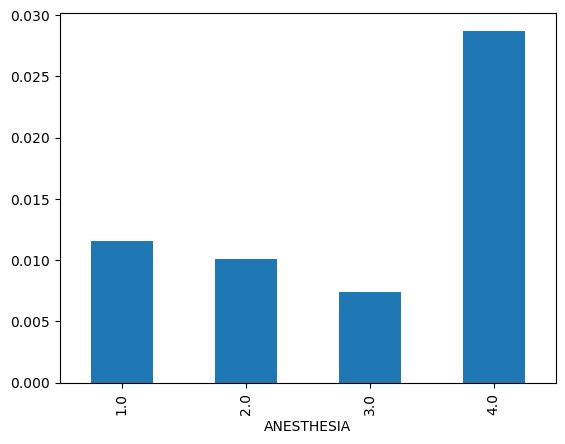

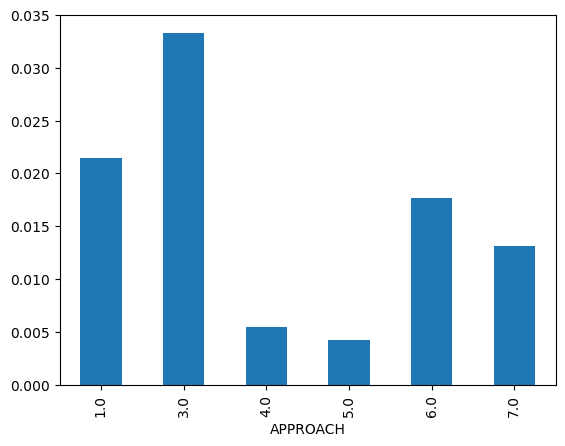

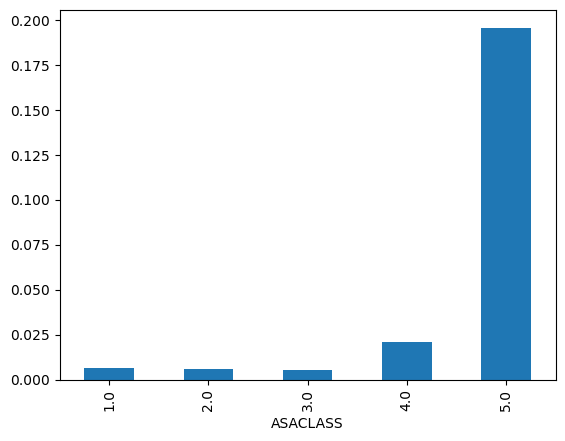

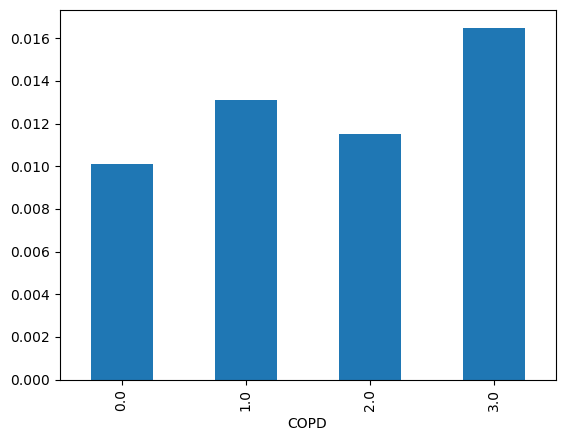

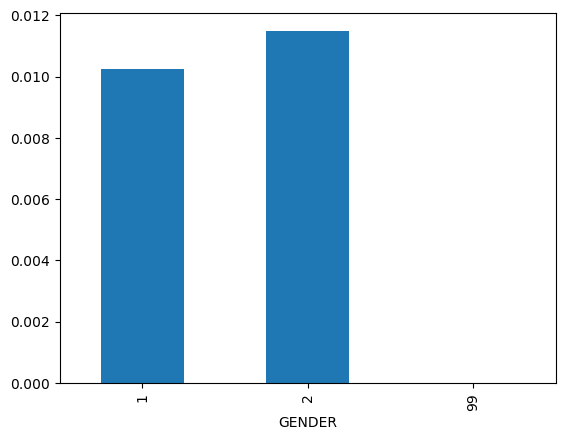

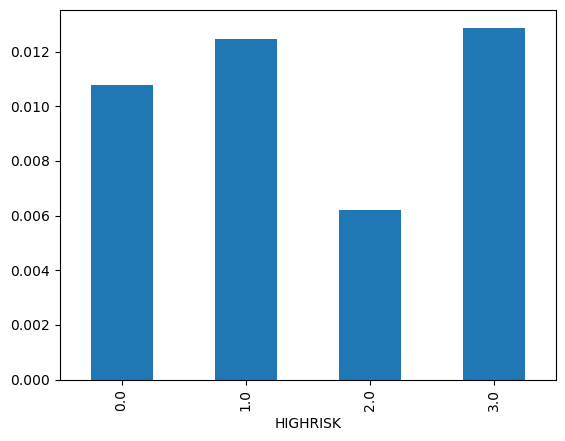

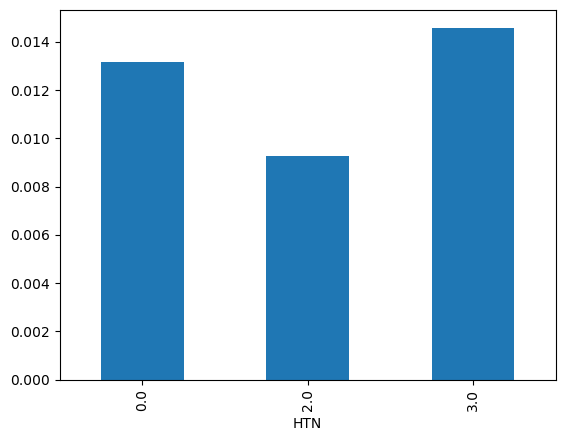

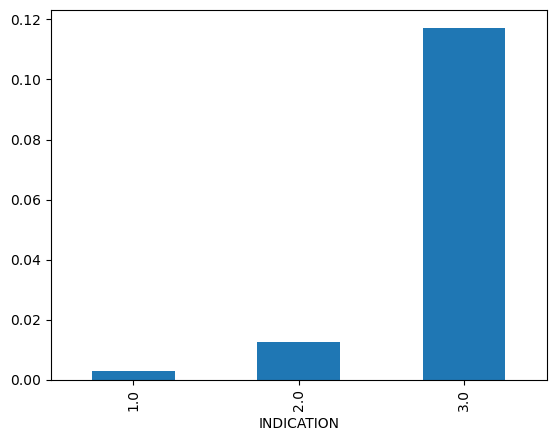

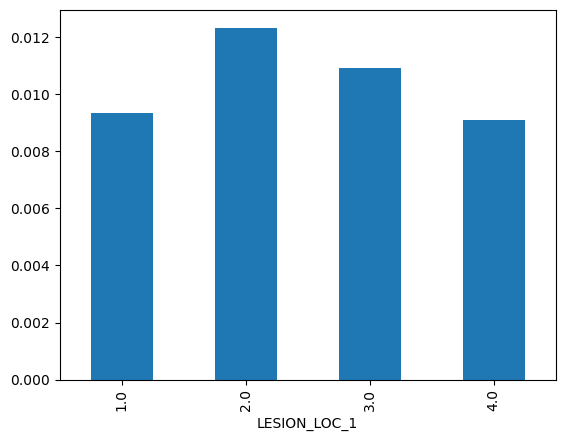

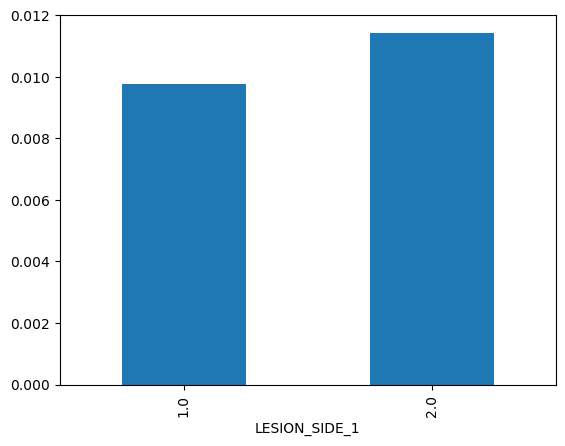

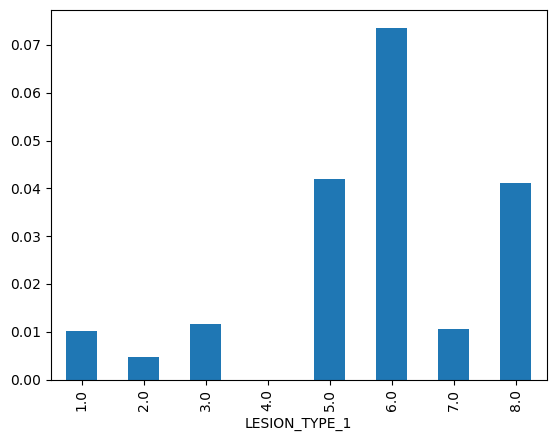

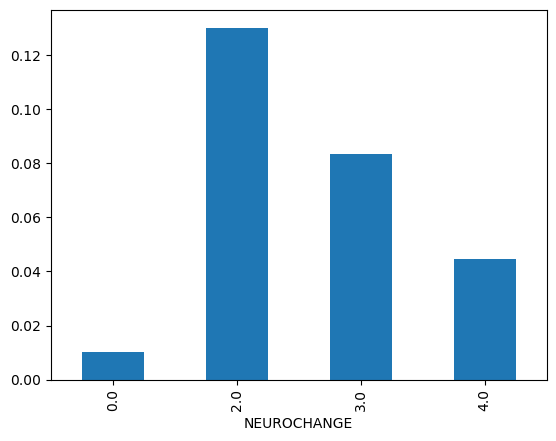

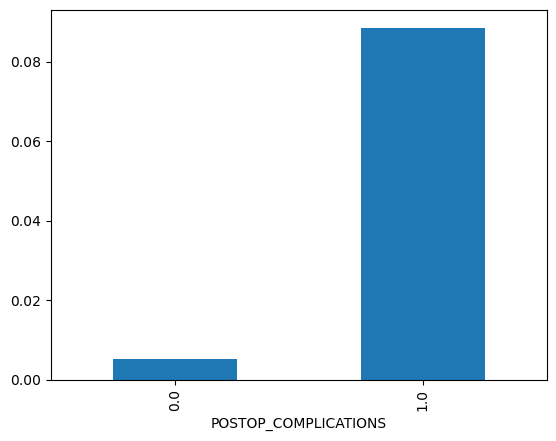

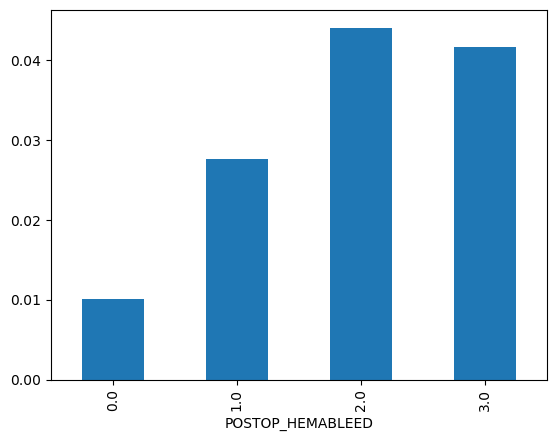

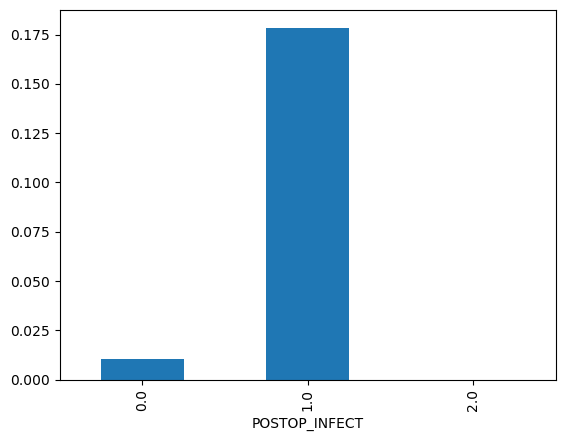

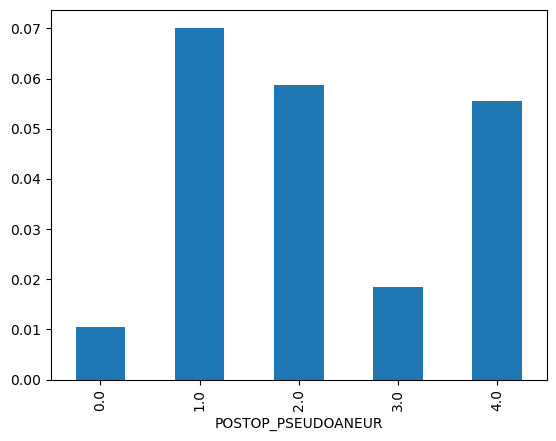

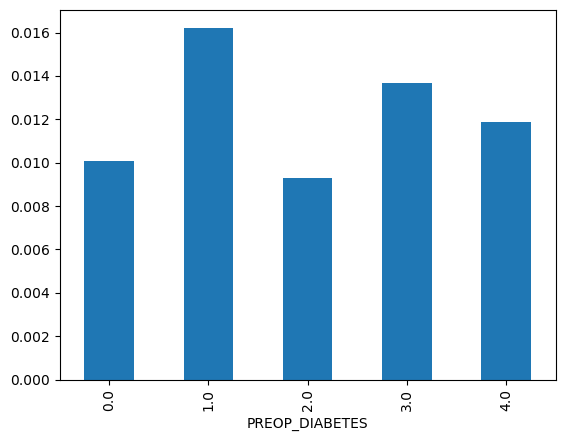

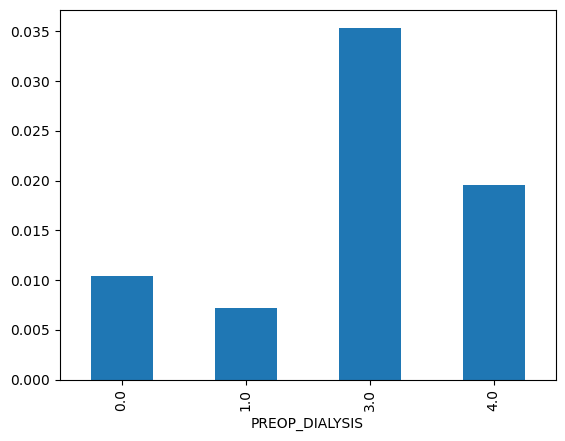

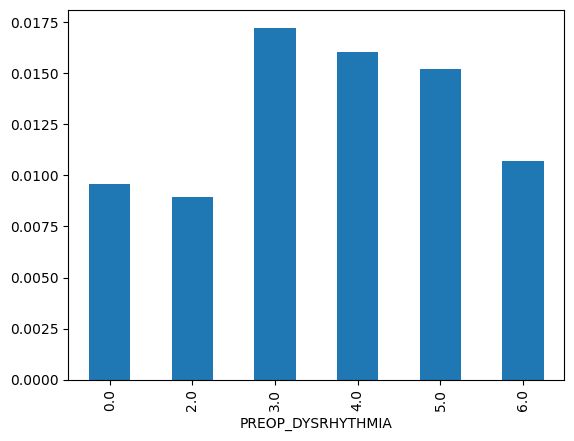

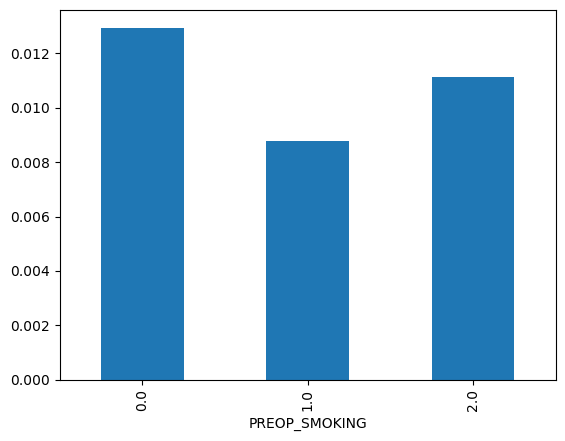

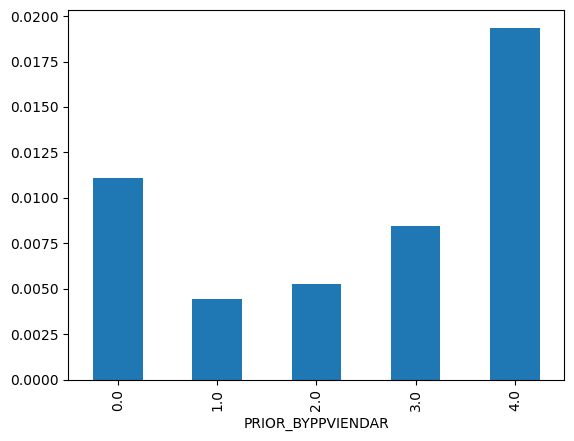

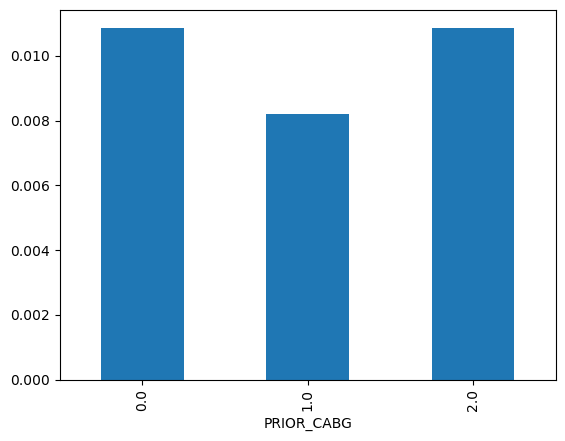

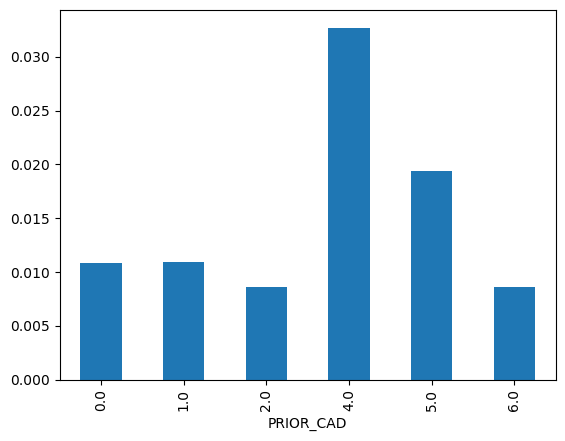

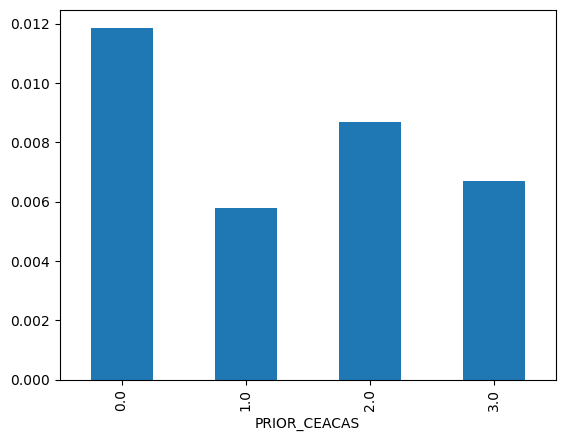

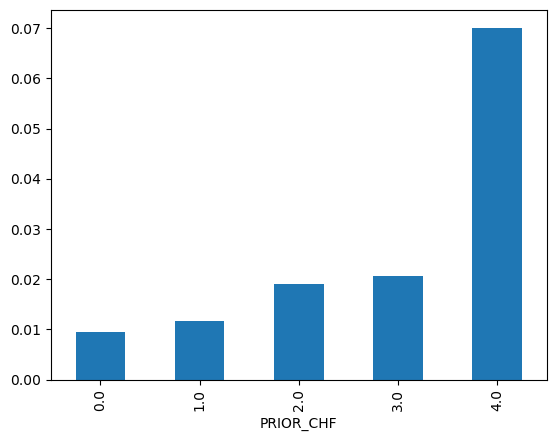

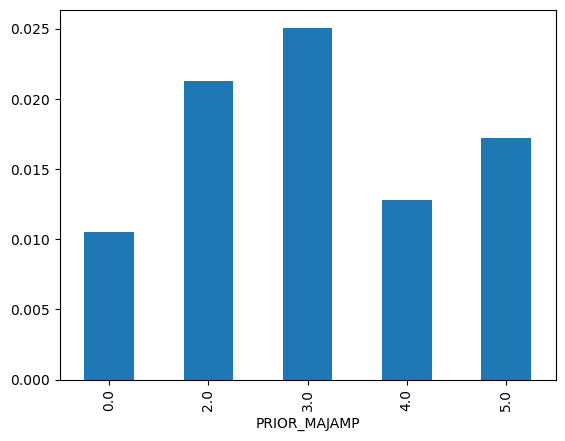

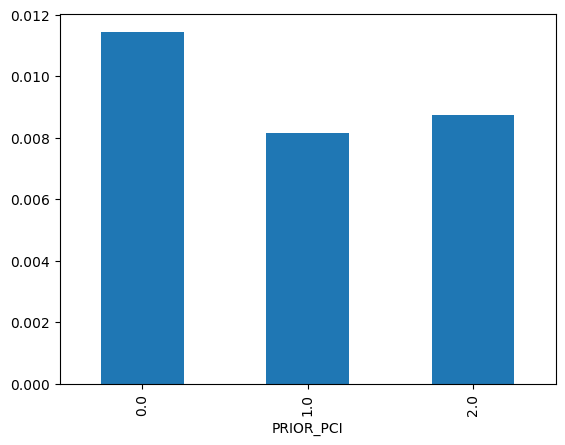

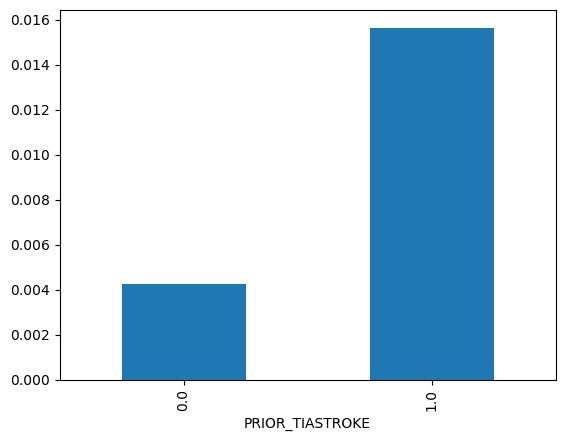

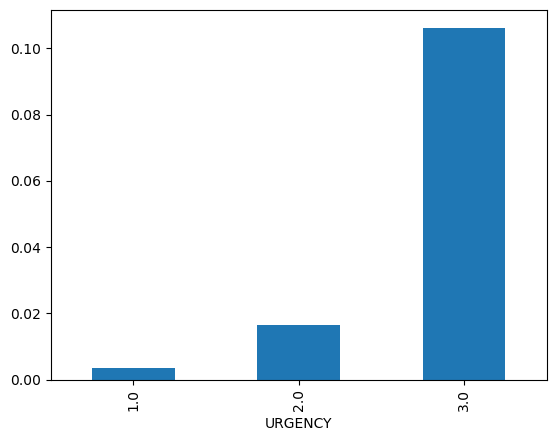

In [10]:
# Charting catagorical distribution for in Mortality
for k in cat_data:
    if k != 'MORTALITY_EVENT' or 'MI_EVENT' or 'STROKE_EVENT':
        df.groupby([k])['MORTALITY_EVENT'].mean().plot.bar() ### Change the [_EVENT] to MI or STROKE when you want to look for them
        plt.show()

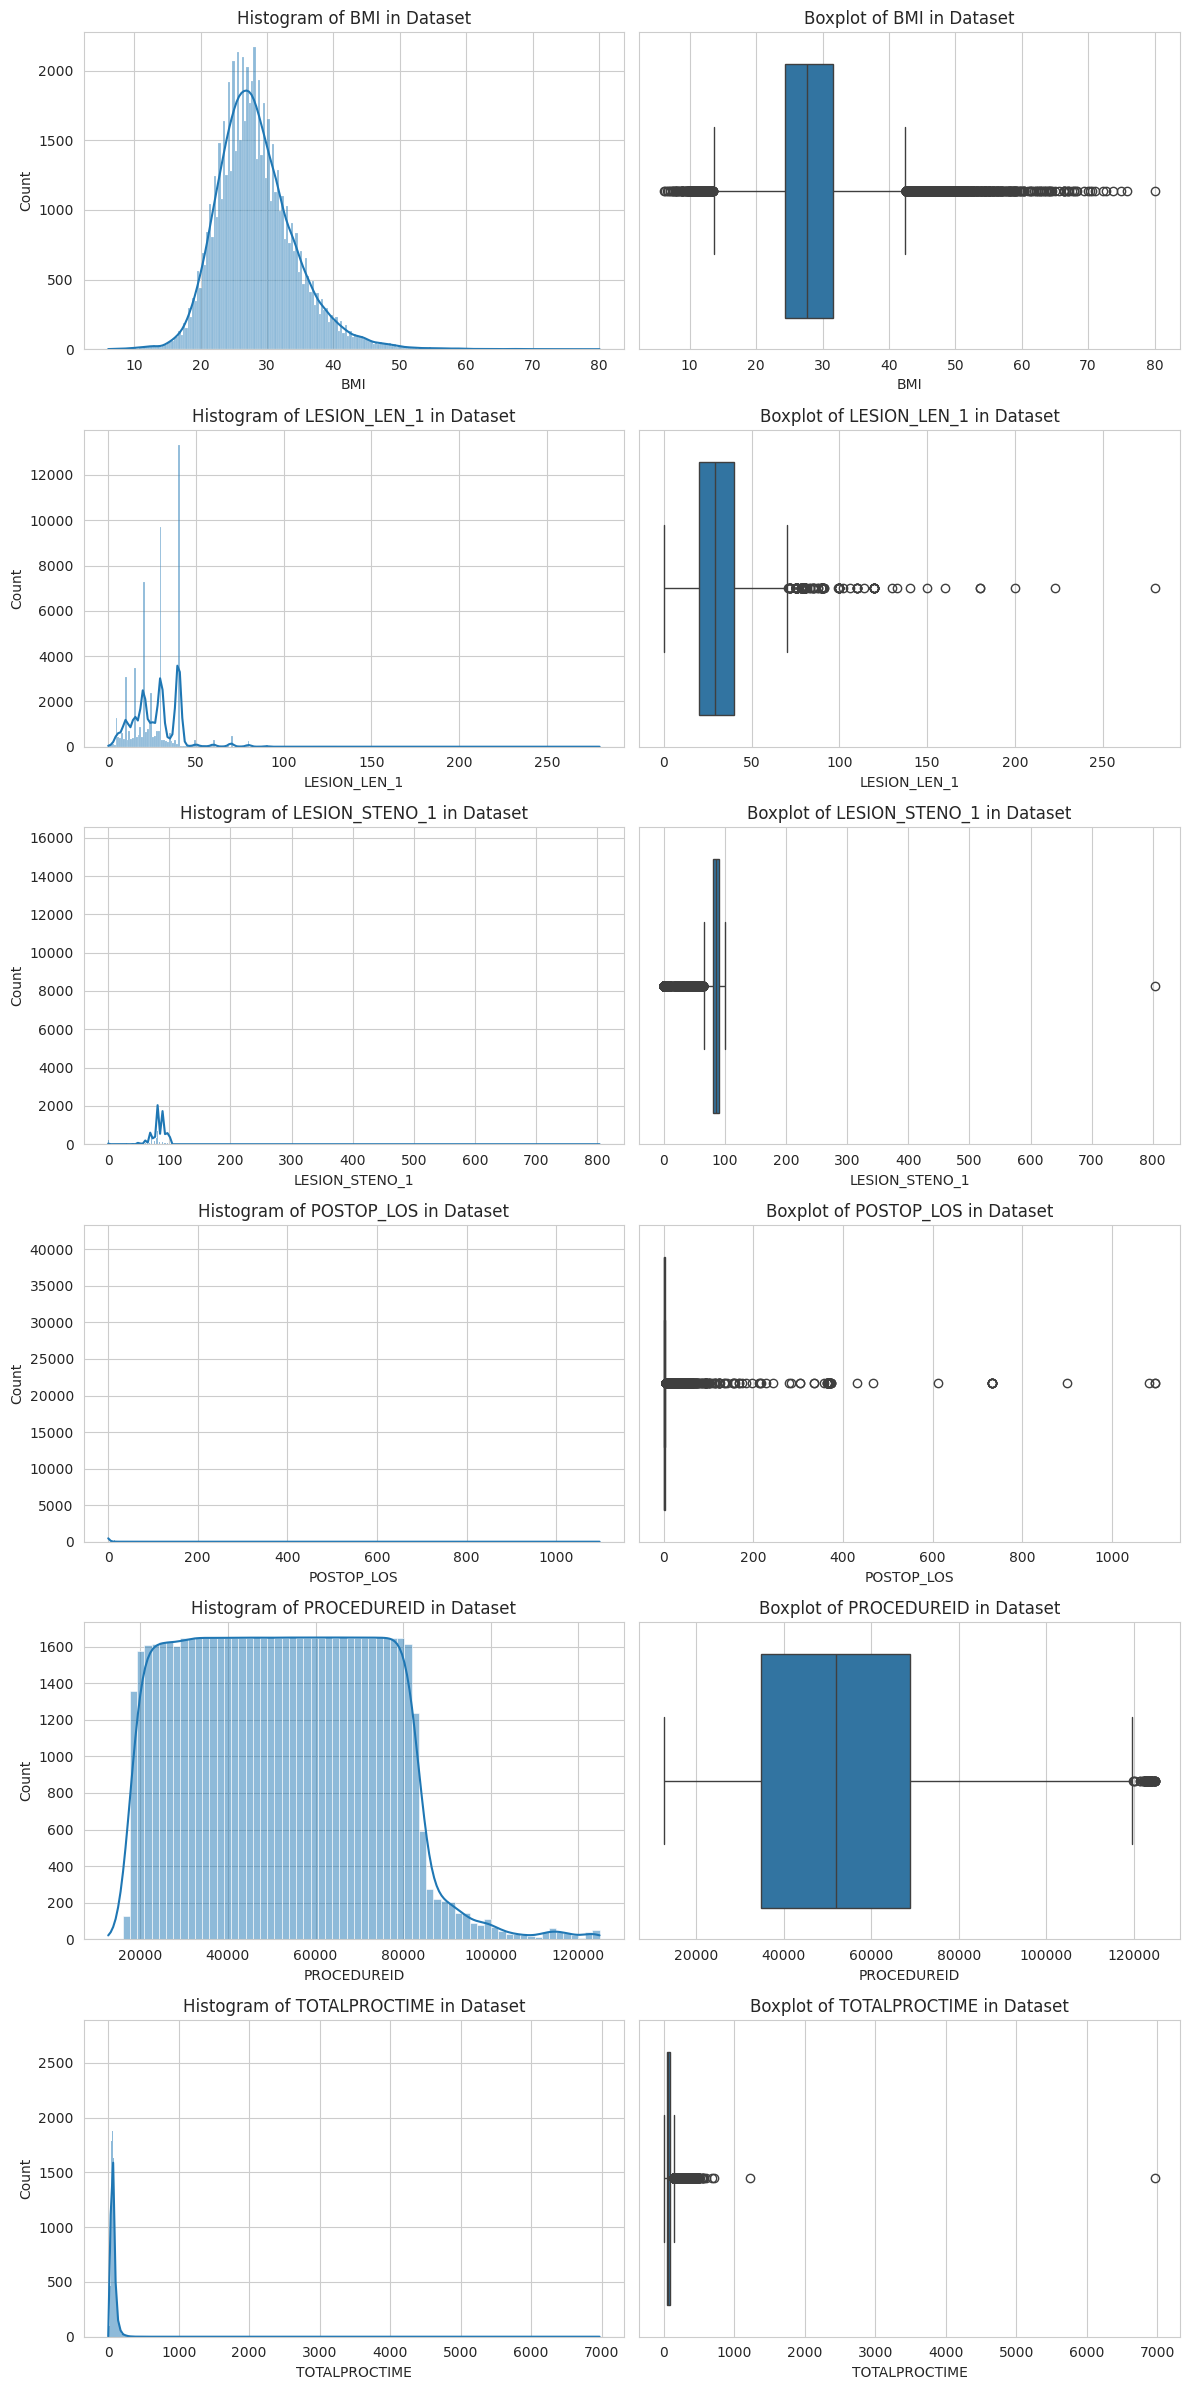

In [11]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(data, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(data[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['BMI', 'LESION_LEN_1', 'LESION_STENO_1', 'POSTOP_LOS', 'PROCEDUREID', 'TOTALPROCTIME']

# Plotting for Mathematics dataset
plot_histograms_boxplots(df, columns_of_interest, 'Dataset') 

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


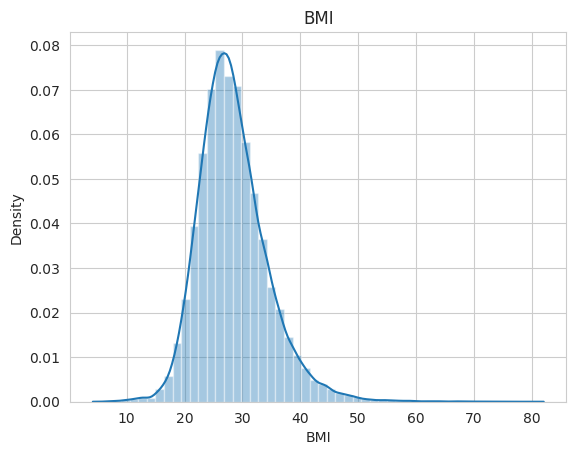

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


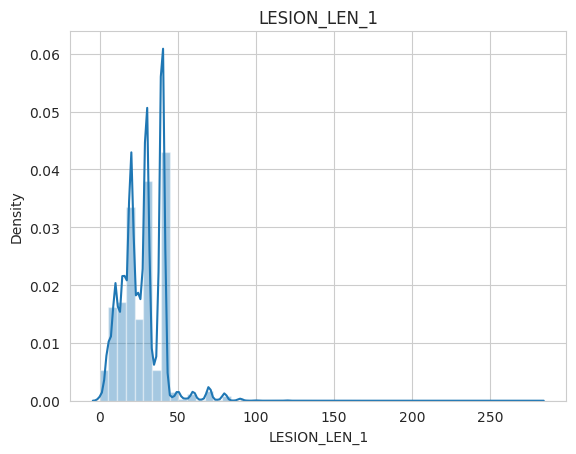

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


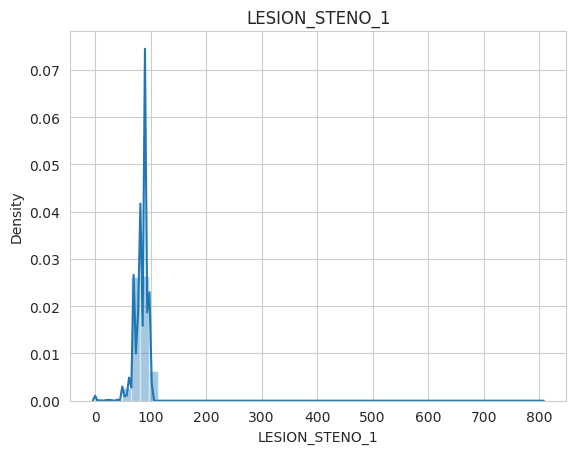

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


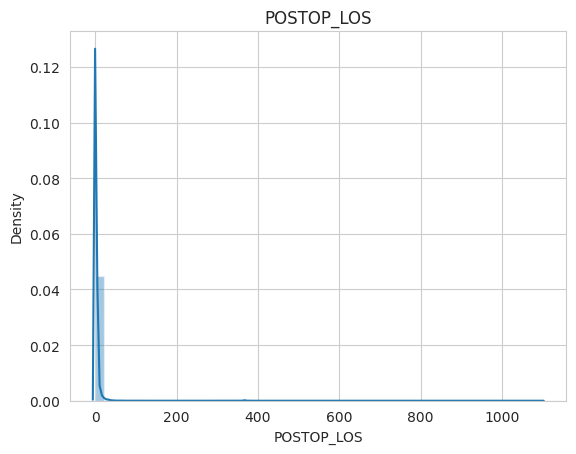

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


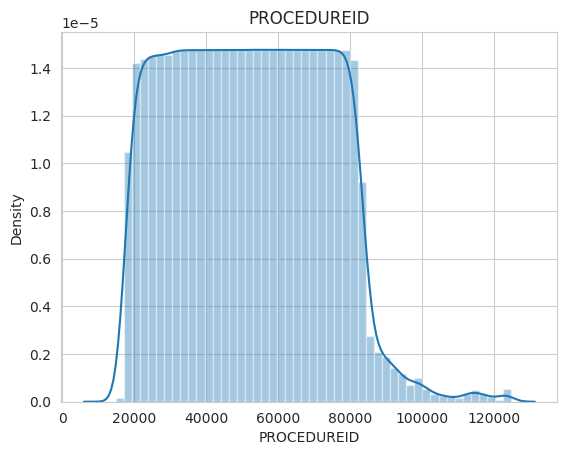

<ipython-input-12-aeab99c1de64>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[k])


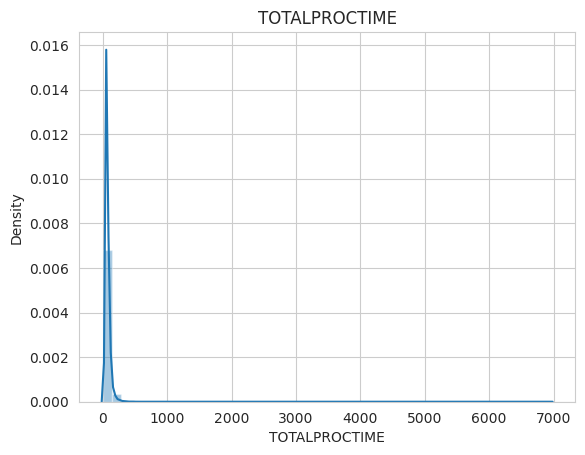

In [12]:
# Same histogram as above, keeping for archive
# Linear regression only works if data is symmetrically distributed
for k in num_data:
    if k != 'MORTALITY_EVENT' or 'MI_EVENT' or 'STROKE_EVENT' :
        sns.distplot(df[k])
        plt.title(k)
        plt.show()

# BMI is the only one with a normal distribution        
# can scale down procedure_id with log, min/max scalar, or standard scalar

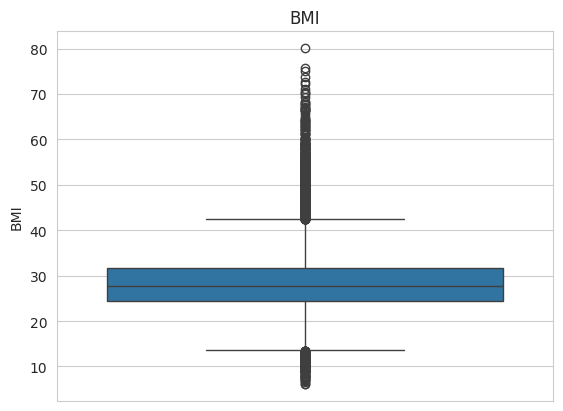

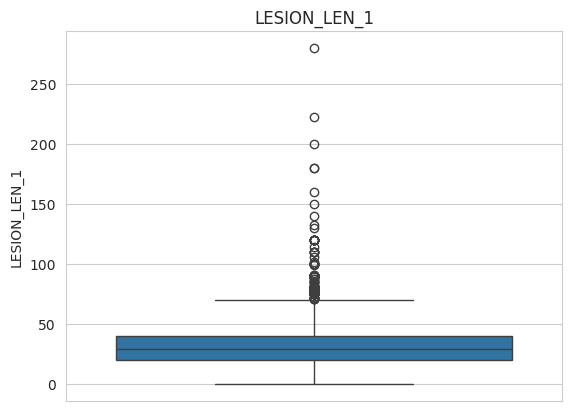

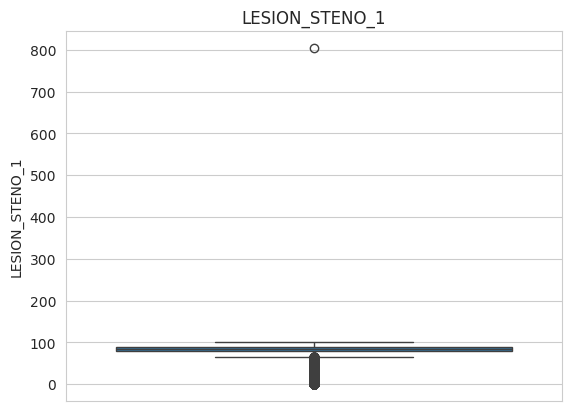

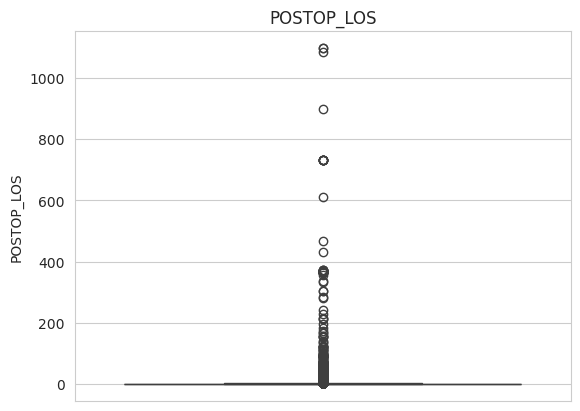

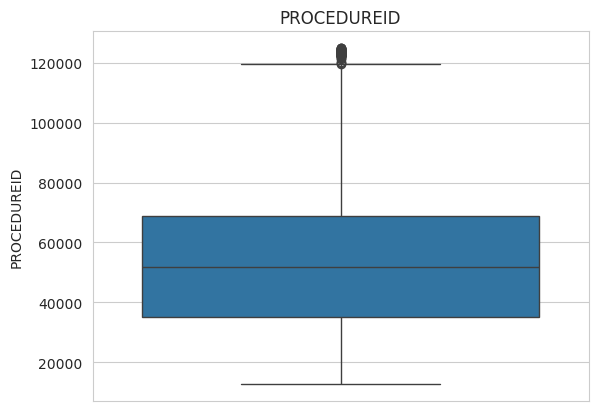

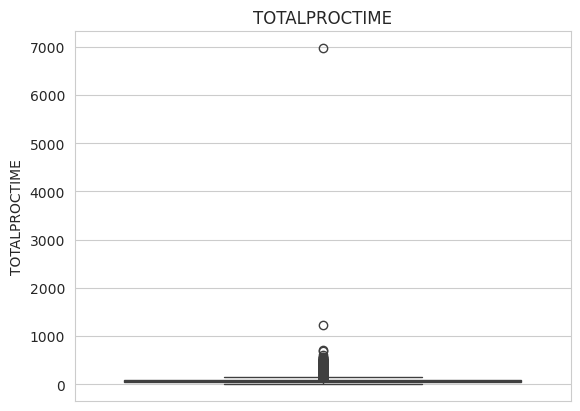

In [13]:
# Same boxplot as above, keeping for archive
# Box-plots for numerical to look for outliers in Mortality
for k in num_data:
    if k != 'MORTALITY_EVENT' or 'MI_EVENT' or 'STROKE_EVENT':
        sns.boxplot(df[k])
        plt.title(k)
        plt.show()

# SO MANY OUTLIERS WOW
# NEED FEATURE SCALING